<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/Geet/p3_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up notebook


In [106]:
# cloning our Project Repo
# !git clone -b Geet https://github.com/farhanwadia/nlp_g14.git

In [107]:
# %cd nlp_g14/

In [108]:
# ! ls

# Import Libraries


In [109]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try: 
  import langdetect
except:
  !pip install langdetect
  import langdetect

# to make sure our plots are inline with the code cells
%matplotlib inline 

# Part 1: Train Model (Part 1's end)

In [110]:
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000))
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000))
idx = np.concatenate((negative_idx, positive_idx))
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1)
ttr_data

,text,label,language
0,The #Celtics season hasn't started off the way...,0,en
1,And the case for God from our yearning has a m...,0,en
2,what the fuck minseok's jxncnckcxx https://t.c...,0,en
3,#dubchallenge bc why not https://t.co/avn0SecD17,0,en
4,Teeter Hang Ups EP-560 Inversion Table ComforT...,0,en
...,...,...,...
9995,Good morning! Sunny but cool with highs in the...,1,en
9996,extremely thankful for my bffs. Thank you guys...,1,en
9997,Genuine happiness. I love this. https://t.co/x...,1,en
9998,RT @roywolt: please vote me as biggest zen fan...,1,en


In [111]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

def PreProcessor(text):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')
  # stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [112]:
# Pre process the data
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

In [113]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)


In [114]:
X_train

,text,language,pre-processed,pre-processed text
4967,Tb to the day I felt like a freaking bomb ass ...,en,"[tb, day, felt, like, freaking, bomb, as, prin...",tb day felt like freaking bomb as princess thr...
8516,Enjoy the day #HappyVeteransday https://t.co/B...,en,"[enjoy, day, happyveteransday]",enjoy day happyveteransday
6486,I'm so proud of you. I love you @camilacabello...,en,"[proud, love, loveonlytee]",proud love loveonlytee
2344,Even water pumps in Arhab poor villagers relay...,en,"[even, water, pump, arhab, poor, villager, rel...",even water pump arhab poor villager relay beca...
5322,Happy birthday to my best friend and my person...,en,"[happy, birthday, best, friend, person, see, f...",happy birthday best friend person see friday
...,...,...,...,...
1907,When your #boss wants you to #suck another guy...,en,"[bos, want, suck, another, guy, ca, suck]",bos want suck another guy ca suck
4927,"@MartinSFP I'm sorry, Martin. https://t.co/cE7...",en,"[martinsfp, sorry, martin]",martinsfp sorry martin
4511,Ol' cranky has done well. https://t.co/yEasuO7yX8,en,"[ol, cranky, done, well]",ol cranky done well
9408,Happy birthday pretty girl ily!💗 https://t.co/...,en,"[happy, birthday, pretty, girl, ily]",happy birthday pretty girl ily


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Vectorize(data, Vectorizer):
  X = Vectorizer.transform(data)
  words = Vectorizer.get_feature_names_out()
  X = pd.DataFrame(X.toarray())
  X.columns = words
  return X

In [116]:
# TF-IDF generation on pre-processed text

Vectorizer = TfidfVectorizer(analyzer = PreProcessor)
# Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
# X_train = Vectorize(X_train['text'], Fitted_Vectorizer)

Fitted_Vectorizer = Vectorizer.fit(X_train['pre-processed text'])
X_train = Vectorize(X_train['pre-processed text'], Fitted_Vectorizer)


In [117]:
# Only keep English Words

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(word):
  try:
    return detect(word)
  except LangDetectException:
    return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']
english_words

['aaronspears',
 'abcnetwork',
 'abducted',
 'abort',
 'aborted',
 'abortion',
 'abpmarathon',
 'absolutely',
 'accessory',
 'accomplished',
 'account',
 'accts',
 'accused',
 'aceminseok',
 'achieved',
 'acknowledges',
 'acreativedc',
 'acted',
 'acting',
 'actingdead',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actorleeminho',
 'actually',
 'adcoteschool',
 'addiction',
 'adoptdontshop',
 'advanced',
 'advocating',
 'advocatingasd',
 'aestheticdolls',
 'affected',
 'affection',
 'affirmation',
 'agency',
 'aircraft',
 'aired',
 'aitcofficial',
 'alcoholawareness',
 'aldubnowandthen',
 'aliciakeys',
 'alliflowers',
 'allingtoncrace',
 'allnewsongs',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'allthingshallyu',
 'alpha',
 'alphaomegatour',
 'already',
 'although',
 'altright',
 'altrightmeans',
 'alyssapacheco',
 'americafirst',
 'americanwrestle',
 'americaswhitetable',
 'amount',
 'amreading',
 'amwriting',
 'analhentai',
 'analytics',
 'anchor',
 'andersoncoo

In [118]:
X_train = X_train[english_words]

In [119]:
# Train our Model - from the comprehensive Part 1 code we found the best model and that is used here

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

best_model = MLPClassifier(random_state = 4, max_iter = 1000, hidden_layer_sizes=[100, 50], activation='relu')
pca = PCA(n_components=1500)
pca.fit(X_train)
best_model.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=1000, random_state=4)

# Part 2.1 Scrape Data

Add the scraping data here but, comment it

# Part 2.2 Sentiment Classification

## Reddit Data - Clean and Read

In [120]:
reddit_data = 'russia_ukraine_reddit_comments.csv'
reddit_df = pd.read_csv(reddit_data)
reddit_df.head()

,Post - Author,Post - Date,Post - Is Distinguished,Post - Is Edited,Post - Is Original Content,Post - Is Locked,Post - Name,Post - num_comments,Post - over_18,Post - Permalink,...,Author,Date,Parent ID Prefix,Parent ID,Is Distinguished,Is Edited,Is Stickied,Permalink,Score,Body
0,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,iwsfutcmd,2023-03-15 19:15:22,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,75,Myanmar?\n\nwell that's a surprise
1,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,snowday784,2023-03-15 17:25:13,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,316,Bolivia what is you doing bby
2,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,micahsaurus,2023-03-15 15:32:45,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,202,"Kind of misleading.\n\nIt should read, “Which ..."
3,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,grisioco,2023-03-15 14:28:30,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,371,you know youre in the right when the only coun...
4,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,Foreign_Phone59,2023-03-15 22:18:48,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,50,Not Afganistan and Myanmar being beacons of re...


In [121]:
reddit_df['Date'].value_counts()

2022-03-03 09:57:35    2
2022-03-01 17:12:20    2
2023-02-20 19:49:39    2
2022-02-24 04:43:07    2
2022-03-01 17:45:34    2
                      ..
2023-02-24 15:57:55    1
2023-02-24 20:08:23    1
2023-02-24 18:33:48    1
2023-02-24 17:59:51    1
2023-02-21 17:36:10    1
Name: Date, Length: 7806, dtype: int64

In [122]:
red_text_df = reddit_df[['Body', 'Date']].copy(deep=True)

In [123]:
# Check nulls
red_text_df.isnull().sum(axis=0)

Body    0
Date    0
dtype: int64

In [124]:
# Drop Duplicates
print(red_text_df.info())
red_text_df.drop_duplicates(subset='Body', inplace=True)
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    7852 non-null   object
 1   Date    7852 non-null   object
dtypes: object(2)
memory usage: 122.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    7645 non-null   object
 1   Date    7645 non-null   object
dtypes: object(2)
memory usage: 179.2+ KB


In [125]:
# Filter to only have english

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(text):
  try:
    return detect(text)
  except:
    return None

red_text_df['language'] = red_text_df['Body'].apply(detect_language)
red_text_df.head()

,Body,Date,language
0,Myanmar?\n\nwell that's a surprise,2023-03-15 19:15:22,en
1,Bolivia what is you doing bby,2023-03-15 17:25:13,en
2,"Kind of misleading.\n\nIt should read, “Which ...",2023-03-15 15:32:45,en
3,you know youre in the right when the only coun...,2023-03-15 14:28:30,en
4,Not Afganistan and Myanmar being beacons of re...,2023-03-15 22:18:48,en


In [126]:
# red_text_df['language'].value_counts()

In [127]:
# df_check = red_text_df[red_text_df['language'] != 'en']
# df_check.head(40)

In [128]:
red_text_df = red_text_df[red_text_df['language'] == 'en']
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7231 entries, 0 to 7851
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      7231 non-null   object
 1   Date      7231 non-null   object
 2   language  7231 non-null   object
dtypes: object(3)
memory usage: 226.0+ KB


(-0.5, 399.5, 199.5, -0.5)

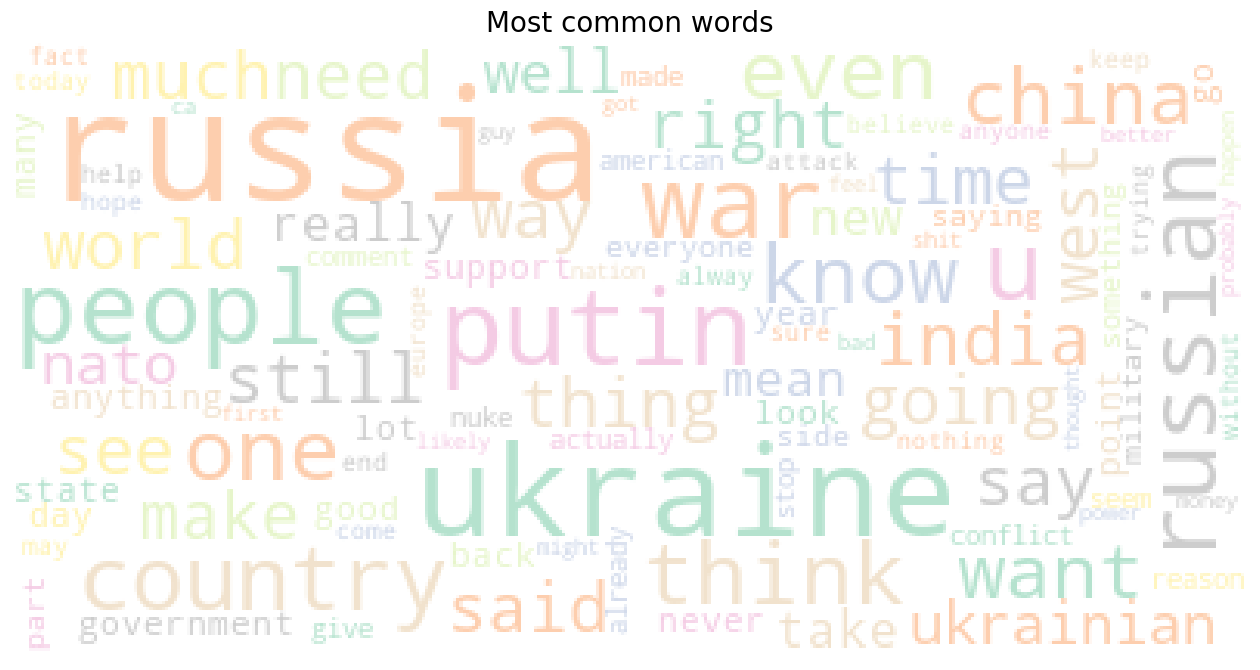

In [129]:
# let's checkput the word cloud of the tweets we have
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud
red_text_df['pre-processed'] = red_text_df['Body'].map(PreProcessor)
red_text_df['pre-processed text'] = red_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(red_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

## Reddit Data - Sentiment Classification

In [130]:
X_test_red = Vectorize(red_text_df['Body'], Fitted_Vectorizer)
X_test_red = X_test_red[english_words]
test_pred_red = best_model.predict(X_test_red)  

In [131]:
print(test_pred_red.shape)
test_pred_red

(7231,)


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [132]:
positive_idx_red = np.where(test_pred_red==1)[0].tolist()
negative_idx_red = np.where(test_pred_red==0)[0].tolist()

In [133]:
## USE THE MODEL TO GET POSITIVE TEXT & NEGATIVE TEXT
# split = int(red_text_df.shape[0]/2)
# positive = red_text_df.iloc[:split,:]
# negative = red_text_df.iloc[split:,:]

positive_red = red_text_df.iloc[positive_idx_red,:]
negative_red = red_text_df.iloc[negative_idx_red,:]


In [134]:
positive_red.head()

,Body,Date,language,pre-processed,pre-processed text
0,Myanmar?\n\nwell that's a surprise,2023-03-15 19:15:22,en,"[myanmar, well, surprise]",myanmar well surprise
1,Bolivia what is you doing bby,2023-03-15 17:25:13,en,"[bolivia, bby]",bolivia bby
2,"Kind of misleading.\n\nIt should read, “Which ...",2023-03-15 15:32:45,en,"[kind, misleading, read, country, voted, russi...",kind misleading read country voted russian inv...
4,Not Afganistan and Myanmar being beacons of re...,2023-03-15 22:18:48,en,"[afganistan, myanmar, beacon, reason, asia]",afganistan myanmar beacon reason asia
5,Poor Mongolia completely reliant on 2 absolute...,2023-03-15 23:24:35,en,"[poor, mongolia, completely, reliant, absolute...",poor mongolia completely reliant absolute shit...


## Twitter Data - Read and Clean

In [135]:
twitter_data = 'Raw_Tweet_Data.csv'
twitter_df = pd.read_csv(twitter_data)
twitter_df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,0
0,https://twitter.com/NatasaJevtovic/status/1498...,2022-02-27 23:59:43+00:00,Ex-Nato head says #Putin wanted to join allian...,Ex-Nato head says #Putin wanted to join allian...,1498085470374445056,"{'username': 'NatasaJevtovic', 'id': 489482046...",0,0,0,0,...,NaN,"[{'username': 'irismarketiq', 'id': 1471155981...",NaN,NaN,"['Putin', 'Nato', 'RussiaUkraine', 'RussiaUkra...",NaN,{'title': 'Ex-Nato head says Putin wanted to j...,NaN,NaN,NatasaJevtovic
1,https://twitter.com/TheRoostergod/status/14980...,2022-02-27 23:59:38+00:00,I recommend reading about the first &amp; seco...,I recommend reading about the first &amp; seco...,1498085448392007686,"{'username': 'TheRoostergod', 'id': 4050704716...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TheRoostergod
2,https://twitter.com/34istanbul571/status/14980...,2022-02-27 23:59:34+00:00,Russia-Ukraine tensions: Latest updates from o...,Russia-Ukraine tensions: Latest updates from o...,1498085431770034176,"{'username': '34istanbul571', 'id': 1451340639...",0,0,0,0,...,NaN,"[{'username': 'YouTube', 'id': 10228272, 'disp...",NaN,NaN,NaN,NaN,{'title': 'Russia-Ukraine tensions: Latest upd...,NaN,NaN,34istanbul571
3,https://twitter.com/yesliaaaa/status/149808541...,2022-02-27 23:59:30+00:00,"Omg, im so sad for him. Happy birthday handsom...","Omg, im so sad for him. Happy birthday handsom...",1498085415055593479,"{'username': 'yesliaaaa', 'id': 494917055, 'di...",0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesliaaaa
4,https://twitter.com/Pagetamil/status/149808540...,2022-02-27 23:59:27+00:00,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,1498085402594484228,"{'username': 'Pagetamil', 'id': 2503036010, 'd...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagetamil


In [136]:
twi_text_df = twitter_df[['renderedContent']].copy(deep=True)

In [137]:
twi_text_df.rename(columns={'renderedContent':'Body'}, inplace=True)

In [138]:
twi_text_df.head()

,Body
0,Ex-Nato head says #Putin wanted to join allian...
1,I recommend reading about the first &amp; seco...
2,Russia-Ukraine tensions: Latest updates from o...
3,"Omg, im so sad for him. Happy birthday handsom..."
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...


In [139]:
twi_text_df.isnull().sum(axis=0)

Body    0
dtype: int64

In [140]:
# Drop Duplicates
print(twi_text_df.info())
twi_text_df.drop_duplicates(subset='Body', inplace=True)
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40008 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    40008 non-null  object
dtypes: object(1)
memory usage: 312.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38180 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    38180 non-null  object
dtypes: object(1)
memory usage: 596.6+ KB


In [141]:
# from langdetect import detect, DetectorFactory
# DetectorFactory.seed = 0

# def detect_language(text):
#   try:
#     return detect(text)
#   except:
#     return None

twi_text_df['language'] = twi_text_df['Body'].apply(detect_language)
twi_text_df.head()

,Body,language
0,Ex-Nato head says #Putin wanted to join allian...,en
1,I recommend reading about the first &amp; seco...,en
2,Russia-Ukraine tensions: Latest updates from o...,en
3,"Omg, im so sad for him. Happy birthday handsom...",en
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,ta


In [142]:
twi_text_df = twi_text_df[twi_text_df['language'] == 'en']
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32772 entries, 0 to 40006
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      32772 non-null  object
 1   language  32772 non-null  object
dtypes: object(2)
memory usage: 768.1+ KB


In [143]:
twi_text_df['pre-processed'] = twi_text_df['Body'].map(PreProcessor)
twi_text_df['pre-processed text'] = twi_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

## Twitter Data - Sentiment Classification

In [144]:
X_test_twi = Vectorize(twi_text_df['Body'], Fitted_Vectorizer)
X_test_twi = X_test_twi[english_words]
test_pred_twi = best_model.predict(X_test_twi)  

In [145]:
test_pred_twi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
positive_idx_twi = np.where(test_pred_twi==1)[0].tolist()
negative_idx_twi = np.where(test_pred_twi==0)[0].tolist()

In [147]:
positive_twi = twi_text_df.iloc[positive_idx_twi,:]
negative_twi = twi_text_df.iloc[negative_idx_twi,:]

positive_words_twi = positive_twi['pre-processed'].tolist()
negative_words_twi = negative_twi['pre-processed'].tolist()

# Part 3: Topic Modeling / Identification

## 3.1 Reddit Data 

### Method 1: LDA - gensim library

LDA resource: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 


Tips to improve this model: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

Topic Modeling/Analysis Intro: 
1. https://monkeylearn.com/blog/introduction-to-topic-modeling/ 
2. https://monkeylearn.com/topic-analysis/ 

In [148]:
def token(text):
    token = nltk.word_tokenize(text)
    return token

# positive['Body Tokens'] = positive['Body'].map(token)
# positive_words = positive['Body Tokens'].tolist()
# negative['Body Tokens'] = negative['Body'].map(token)
# negative_words = negative['Body Tokens'].tolist()

positive_words_red = positive_red['pre-processed'].tolist()
negative_words_red = negative_red['pre-processed'].tolist()

In [149]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p_red = corpora.Dictionary(positive_words_red)
# Create Corpus
texts_p_red = positive_words_red
# Term Document Frequency
corpus_p_red = [id2word_p_red.doc2bow(text) for text in texts_p_red]

# Create Dictionary
id2word_n_red = corpora.Dictionary(negative_words_red)
# Create Corpus
texts_n_red = negative_words_red
# Term Document Frequency
corpus_n_red = [id2word_n_red.doc2bow(text) for text in texts_n_red]

In [150]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p_red = gensim.models.LdaMulticore(corpus=corpus_p_red,
                                       id2word=id2word_p_red,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('REDDIT DATA: Topics from Positive comments:\n')
pprint(lda_model_p_red.print_topics())
doc_lda_p_red = lda_model_p_red[corpus_p_red]

REDDIT DATA: Topics from Positive comments:

[(0,
  '0.013*"russia" + 0.010*"putin" + 0.008*"u" + 0.008*"people" + 0.008*"would" '
  '+ 0.008*"one" + 0.006*"russian" + 0.006*"get" + 0.005*"shit" + '
  '0.005*"like"'),
 (1,
  '0.016*"russia" + 0.008*"ukraine" + 0.008*"russian" + 0.007*"china" + '
  '0.007*"like" + 0.006*"putin" + 0.006*"war" + 0.006*"think" + 0.005*"going" '
  '+ 0.005*"guy"'),
 (2,
  '0.016*"ukraine" + 0.013*"russia" + 0.012*"russian" + 0.008*"people" + '
  '0.008*"war" + 0.007*"u" + 0.007*"china" + 0.007*"like" + 0.005*"country" + '
  '0.005*"putin"'),
 (3,
  '0.020*"russia" + 0.014*"ukraine" + 0.010*"putin" + 0.010*"country" + '
  '0.010*"war" + 0.009*"want" + 0.009*"one" + 0.009*"like" + 0.008*"russian" + '
  '0.006*"u"'),
 (4,
  '0.017*"russia" + 0.015*"ukraine" + 0.012*"war" + 0.011*"get" + '
  '0.009*"would" + 0.009*"like" + 0.007*"know" + 0.007*"one" + 0.007*"putin" + '
  '0.005*"think"'),
 (5,
  '0.011*"india" + 0.010*"russia" + 0.009*"war" + 0.007*"china" + '


In [151]:
lda_model_n_red = gensim.models.LdaMulticore(corpus=corpus_n_red,
                                       id2word=id2word_n_red,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('REDDIT DATA: Topics from Negative comments:\n')
pprint(lda_model_n_red.print_topics())
doc_lda_n_red = lda_model_n_red[corpus_n_red]

REDDIT DATA: Topics from Negative comments:

[(0,
  '0.009*"russia" + 0.008*"ukraine" + 0.007*"would" + 0.006*"said" + '
  '0.006*"people" + 0.006*"think" + 0.006*"putin" + 0.005*"know" + '
  '0.005*"country" + 0.005*"even"'),
 (1,
  '0.018*"russia" + 0.017*"war" + 0.011*"people" + 0.010*"u" + 0.008*"ukraine" '
  '+ 0.008*"would" + 0.007*"like" + 0.006*"one" + 0.006*"country" + '
  '0.005*"russian"'),
 (2,
  '0.026*"russia" + 0.015*"war" + 0.013*"ukraine" + 0.011*"russian" + '
  '0.007*"putin" + 0.006*"like" + 0.006*"think" + 0.006*"would" + '
  '0.006*"country" + 0.005*"people"'),
 (3,
  '0.017*"russia" + 0.015*"ukraine" + 0.012*"putin" + 0.010*"would" + '
  '0.010*"country" + 0.010*"russian" + 0.009*"people" + 0.007*"war" + '
  '0.006*"think" + 0.005*"u"'),
 (4,
  '0.011*"war" + 0.011*"ukraine" + 0.010*"people" + 0.008*"nuclear" + '
  '0.008*"russia" + 0.007*"russian" + 0.006*"right" + 0.005*"putin" + '
  '0.005*"really" + 0.005*"ukrainian"'),
 (5,
  '0.010*"ukraine" + 0.008*"russian

### Method 2: LDA - sklearn library

LDA #2 Resource: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect_p_red =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_red =vect_p_red.fit_transform(positive_red['pre-processed text'])
# vect_text_p =vect.fit_transform(positive['Body'])

In [156]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p2_red=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p2_red=lda_model_p2_red.fit_transform(vect_text_p_red)

In [195]:
vocab = vect_p_red.get_feature_names_out()
print('REDDIT DATA: Topics from Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p2_red.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')


REDDIT DATA: Topics from Positive Comments - Method 2
Topic 0: 
wrong people city best weird almost vietnam believe send die stupid god free democracy sub 

Topic 1: 
russian russia china good call way oil probably give guy wait like might one get 

Topic 2: 
said sure chinese called check exactly pray unless live got non ta meant support plan 

Topic 3: 
would russia ukraine putin war think world like get country russian one china time year 

Topic 4: 
shit pretty read fucking reddit war comment piece neutral much propaganda man joke like fair 

Topic 5: 
come quite desantis seems two mean deal ball nothing face real absolutely forgot hard trust 

Topic 6: 
fuck guess line go front oh top depends dick yeltsin truth cool gone crazy abstained 

Topic 7: 
biden true news friend fucked sorry point stay kill british someone see definitely huh po 

Topic 8: 
putin north got korea na life trump look love number source forget jesus gon never 

Topic 9: 
well one russia made time un say starte

In [158]:
vect_n_red =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_red =vect_n_red.fit_transform(negative_red['pre-processed text'])

In [159]:
lda_model_n_red=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_red=lda_model_n_red.fit_transform(vect_text_n_red)

In [196]:
vocab = vect_n_red.get_feature_names_out()
print('REDDIT DATA: Topics from Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_red.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')

REDDIT DATA: Topics from Negative Comments - Method 2
Topic 0: 
lie belarus relation return country le corrupt ukraine dont hell still yes example support much 

Topic 1: 
fascist born leadership party reported tv president window yesterday become straight surprised late democracy taiwan 

Topic 2: 
gop desantis law according sort money name anxious train international territorial nothing people forced headline 

Topic 3: 
people putin russia like war one ukraine get russian think would know really country thing 

Topic 4: 
thought knew pretty chance japan win sending hitler nazi election america stop majority involved false 

Topic 5: 
russia russian ukraine would war people china nuclear country putin like said west even one 

Topic 6: 
know right revolution need victim dependent head india always left video something apparently quite think 

Topic 7: 
vietnam china like hate damn thing two history definitely russia sound war ukraine trade country 

Topic 8: 
india pakistan afghanist

## 3.2 Twitter Data

### Method 1: LDA - gensim library

In [161]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p_twi = corpora.Dictionary(positive_words_twi)
# Create Corpus
texts_p_twi = positive_words_twi
# Term Document Frequency
corpus_p_twi = [id2word_p_twi.doc2bow(text) for text in texts_p_twi]

# Create Dictionary
id2word_n_twi = corpora.Dictionary(negative_words_twi)
# Create Corpus
texts_n_twi = negative_words_twi
# Term Document Frequency
corpus_n_twi = [id2word_n_twi.doc2bow(text) for text in texts_n_twi]

In [162]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p_twi = gensim.models.LdaMulticore(corpus=corpus_p_twi,
                                       id2word=id2word_p_twi,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Positive Comments - method 1')
pprint(lda_model_p_twi.print_topics())
doc_lda_p_twi = lda_model_p_twi[corpus_p_twi]

Twitter Data: Positive Comments - method 1
[(0,
  '0.032*"war" + 0.020*"russia" + 0.019*"ukraine" + 0.013*"conflict" + '
  '0.008*"u" + 0.006*"american" + 0.006*"latest" + 0.006*"news" + 0.005*"get" '
  '+ 0.005*"thing"'),
 (1,
  '0.060*"russia" + 0.054*"ukraine" + 0.020*"war" + 0.010*"u" + '
  '0.010*"russian" + 0.007*"putin" + 0.007*"ukrainian" + 0.006*"kherson" + '
  '0.006*"ukrainewar" + 0.006*"kyiv"'),
 (2,
  '0.063*"russia" + 0.057*"ukraine" + 0.021*"war" + 0.020*"putin" + '
  '0.013*"news" + 0.007*"ukrainian" + 0.007*"russian" + 0.006*"kherson" + '
  '0.005*"u" + 0.005*"nato"'),
 (3,
  '0.073*"war" + 0.064*"ukraine" + 0.047*"russia" + 0.012*"putin" + '
  '0.010*"news" + 0.008*"live" + 0.007*"biden" + 0.006*"russian" + '
  '0.006*"world" + 0.006*"say"'),
 (4,
  '0.058*"ukraine" + 0.057*"russia" + 0.017*"russian" + 0.014*"war" + '
  '0.010*"ukrainian" + 0.008*"ukrainewar" + 0.008*"update" + 0.007*"putin" + '
  '0.007*"kyiv" + 0.006*"live"'),
 (5,
  '0.038*"ukraine" + 0.035*"russia

In [163]:
lda_model_n_twi = gensim.models.LdaMulticore(corpus=corpus_n_twi,
                                       id2word=id2word_n_twi,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Negative Comments - method 1')
pprint(lda_model_n_twi.print_topics())
doc_lda_n_twi = lda_model_n_twi[corpus_n_twi]

Twitter Data: Negative Comments - method 1
[(0,
  '0.043*"ukraine" + 0.033*"russia" + 0.028*"war" + 0.011*"kherson" + '
  '0.006*"putin" + 0.006*"world" + 0.006*"country" + 0.006*"news" + 0.006*"u" '
  '+ 0.005*"russian"'),
 (1,
  '0.042*"ukraine" + 0.033*"russia" + 0.024*"war" + 0.008*"nato" + '
  '0.007*"biden" + 0.006*"country" + 0.006*"putin" + 0.006*"u" + '
  '0.005*"russian" + 0.005*"would"'),
 (2,
  '0.037*"war" + 0.037*"ukraine" + 0.029*"russia" + 0.011*"u" + '
  '0.009*"russian" + 0.009*"country" + 0.009*"putin" + 0.006*"biden" + '
  '0.006*"people" + 0.005*"news"'),
 (3,
  '0.053*"ukraine" + 0.046*"russia" + 0.020*"war" + 0.013*"russian" + '
  '0.008*"putin" + 0.007*"people" + 0.005*"ukrainewar" + 0.005*"military" + '
  '0.005*"kherson" + 0.005*"know"'),
 (4,
  '0.034*"russia" + 0.029*"ukraine" + 0.018*"putin" + 0.015*"war" + '
  '0.010*"conflict" + 0.010*"ukrainian" + 0.006*"u" + 0.006*"russian" + '
  '0.005*"nuclear" + 0.005*"people"'),
 (5,
  '0.039*"russia" + 0.038*"ukrai

### Method 2: LDA - sklearn library

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect_p_twi =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_twi =vect_p_twi.fit_transform(positive_twi['pre-processed text'])
# vect_text_p2 =vect2.fit_transform(positive['Body'])

In [198]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p_twi=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p_twi=lda_model_p_twi.fit_transform(vect_text_p_twi)

In [199]:
vocab2 = vect_p_twi.get_feature_names_out()
print('Twitter Data: Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p_twi.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')


Twitter Data: Positive Comments - Method 2
Topic 0: 
surprise speech poland putin conflict president zelenskyy war russia ukraine watch vladimir read say started 

Topic 1: 
china war ukraine could russia blame covid time battle report next chief go ally side 

Topic 2: 
ukraine russia russian anniversary russiaukrainewar ukrainewar ukrainenews war ukrainerussiawar russiaukraine ukrainian wagner military putin ukrainerussianwar 

Topic 3: 
peace ccp europe situation putin ukraine 中国 market 二十大 difficult china 普京 习近平 疫情 russia 

Topic 4: 
list unitedstates address news thank help share mark top keep three annexed group war understand 

Topic 5: 
britain ukraine russia war arm germany usa visit nuclear world expert biden stopped global putin 

Topic 6: 
kherson ukraine russia kyiv war look year china arrives impact like one ukrainewar medium comment 

Topic 7: 
america war ukraine russia china talk state gas news ahead al jazeera nation pipeline india 

Topic 8: 
day zelensky ukraine war

In [200]:
vect_n_twi =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_twi =vect_n_twi.fit_transform(negative_twi['pre-processed text'])

In [201]:
lda_model_n_twi=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_twi=lda_model_n_twi.fit_transform(vect_text_n_twi)

In [202]:
vocab2 = vect_n_twi.get_feature_names_out()
print('Twitter Data: Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_twi.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')

Twitter Data: Negative Comments - Method 2
Topic 0: 
know day invasion war glance security biden potus ukraine address democracy expert expected joe invaded 

Topic 1: 
visit bakhmut soldier house wounded white interest ukraine fighting wagner air front fighter battlefield coverage 

Topic 2: 
ukraine russia defence congress fight dollar started head war rogozin must caused crime reported laundering 

Topic 3: 
russia ukraine war energy poland price also gas inflation global crisis turkey economy country oil 

Topic 4: 
biden ukraine russia war putin live nato unitedstates germany president border zelensky update crimea news 

Topic 5: 
kherson ukraine russian russia ukrainewar kyiv ukrainian force war troop news drone footage iran attack 

Topic 6: 
america ukraine russia war china britain biden money people trump american would think conflict first 

Topic 7: 
war ukraine russia politics news ukrainenews stand putin breakingnews shelling al research month jazeera life 

Topic 8: 
rus

### (Alternative method) LSA 

Source: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/ 

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_p_twi = vectorizer3.fit_transform(positive_twi['pre-processed text'])
vectorizer4 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_n_twi = vectorizer4.fit_transform(negative_twi['pre-processed text'])

In [171]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model_p_twi = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_p_twi.fit(Out_p_twi)

svd_model_n_twi = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_n_twi.fit(Out_n_twi)


TruncatedSVD(n_components=10, n_iter=100, random_state=122)

In [172]:
terms_p_twi = vectorizer3.get_feature_names_out()
print('Twitter Data Method 3: LSA - Positive Comments')
for i, comp in enumerate(svd_model_p_twi.components_):
    terms_comp = zip(terms_p_twi, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Positive Comments
Topic 0: 
war news putin live update russian kherson 

Topic 1: 
putin russian ukrainewar kherson russiaukraine ukrainian kyiv 

Topic 2: 
kherson russian ukrainewar ukrainian news unitedstates ukrainenews 

Topic 3: 
update live news kherson latest york new 

Topic 4: 
day list key event news putin conflict 

Topic 5: 
conflict china update live russiaukraine india youtube 

Topic 6: 
russiaukraine update live ukrainerussiawar day russian list 

Topic 7: 
news russiaukraine ukrainenews russian remain conflict al 

Topic 8: 
biden china russiaukraine news america president joe 

Topic 9: 
russiaukraine kherson kyiv unitedstates conflict war putin 



In [173]:
terms_n_twi = vectorizer4.get_feature_names_out()
print('Twitter Data Method 3: LSA - Negative Comments')
for i, comp in enumerate(svd_model_n_twi.components_):
    terms_comp = zip(terms_n_twi, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Negative Comments
Topic 0: 
war putin russian news know ukrainian kherson 

Topic 1: 
know day invasion war glance latest guardian 

Topic 2: 
day kherson know invasion russian ukrainian glance 

Topic 3: 
putin know invasion day russian nuclear russiaukraine 

Topic 4: 
putin live news war update nuclear say 

Topic 5: 
china biden live update kyiv conflict kherson 

Topic 6: 
kherson putin unitedstates ukrainewar kyiv war america 

Topic 7: 
conflict kherson nato kyiv live nuclear unitedstates 

Topic 8: 
nato live update country kyiv say missile 

Topic 9: 
news nato china nuclear force ukrainenews threat 



## 3.3 Word Embedding

Source: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/ \
https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ 

In [174]:
positive_twi.head()

,Body,language,pre-processed,pre-processed text
5,@ChessProblem I propose that he must play in t...,en,"[chessproblem, propose, must, play, banned, pl...",chessproblem propose must play banned player l...
6,Border to border war is just distant brothers ...,en,"[border, border, war, distant, brother, sister...",border border war distant brother sister killi...
9,Andy Vermaut shares:Live: How will Russia-Ukra...,en,"[andy, vermaut, share, live, conflict, play, t...",andy vermaut share live conflict play thank
12,"w/ all of this russia/ukraine news, the zeitge...",en,"[news, zeitgeist, forgotten, evergrande, lmfao...",news zeitgeist forgotten evergrande lmfao stag...
13,podcasts.apple.com/us/podcast/yed… instagram.c...,en,"[sings, along, mj, tribute, worldpeace, stopwa...",sings along mj tribute worldpeace stopwar russ...


In [175]:
single_doc_p_twi = []
for i in list(positive_twi.index.values):
    single_doc_p_twi.append(positive_twi['pre-processed'][i])

In [176]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

data = single_doc_p_twi

# Create CBOW model
model1_twi = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 3)

# Print results
print("Cosine similarity between 'support' " +
			"and 'russia' - CBOW : ",
	model1_twi.wv.similarity('support', 'russia'))
	
print("Cosine similarity between 'support' " +
				"and 'ukraine' - CBOW : ",
	model1_twi.wv.similarity('support', 'ukraine'))

# Print results
print("Cosine similarity between 'global' " +
			"and 'russia' - CBOW : ",
	model1_twi.wv.similarity('global', 'russia'))
	
print("Cosine similarity between 'global' " +
				"and 'ukraine' - CBOW : ",
	model1_twi.wv.similarity('global', 'ukraine'))

# Create Skip Gram model
model2_twi = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,window = 3, sg = 1)

# Print results
print("Cosine similarity between 'support' " +
		"and 'russia' - Skip Gram : ",
	model2_twi.wv.similarity('support', 'russia'))
	
print("Cosine similarity between 'support' " +
			"and 'ukraine' - Skip Gram : ",
	model2_twi.wv.similarity('support', 'ukraine'))

print("Cosine similarity between 'global' " +
		"and 'russia' - Skip Gram : ",
	model2_twi.wv.similarity('global', 'russia'))
	
print("Cosine similarity between 'global' " +
			"and 'ukraine' - Skip Gram : ",
	model2_twi.wv.similarity('global', 'ukraine'))

Cosine similarity between 'support' and 'russia' - CBOW :  0.9142595
Cosine similarity between 'support' and 'ukraine' - CBOW :  0.89025986
Cosine similarity between 'global' and 'russia' - CBOW :  0.73092455
Cosine similarity between 'global' and 'ukraine' - CBOW :  0.7009398
Cosine similarity between 'support' and 'russia' - Skip Gram :  0.7411407
Cosine similarity between 'support' and 'ukraine' - Skip Gram :  0.7201979
Cosine similarity between 'global' and 'russia' - Skip Gram :  0.44851914
Cosine similarity between 'global' and 'ukraine' - Skip Gram :  0.4587094


In [177]:
single_doc_n_twi = []
for i in list(negative_twi.index.values):
    single_doc_n_twi.append(negative_twi['pre-processed'][i])

In [178]:
data_n_twi = single_doc_n_twi

# Create CBOW model
model1_n_twi = gensim.models.Word2Vec(data_n_twi, min_count = 1, vector_size = 100, window = 3)

# Print results
print("Cosine similarity between 'wounded' " +
			"and 'russia' - CBOW : ",
	model1_n_twi.wv.similarity('wounded', 'russia'))
	
print("Cosine similarity between 'wounded' " +
				"and 'ukraine' - CBOW : ",
	model1_n_twi.wv.similarity('wounded', 'ukraine'))

# Print results
print("Cosine similarity between 'aid' " +
			"and 'russia' - CBOW : ",
	model1_n_twi.wv.similarity('aid', 'russia'))
	
print("Cosine similarity between 'aid' " +
				"and 'ukraine' - CBOW : ",
	model1_n_twi.wv.similarity('aid', 'ukraine'))

# Create Skip Gram model
model2_n_twi = gensim.models.Word2Vec(data_n_twi, min_count = 1, vector_size = 100,window = 3, sg = 1)

# Print results
print("Cosine similarity between 'wounded' " +
		"and 'russia' - Skip Gram : ",
	model2_n_twi.wv.similarity('wounded', 'russia'))
	
print("Cosine similarity between 'wounded' " +
			"and 'ukraine' - Skip Gram : ",
	model2_n_twi.wv.similarity('wounded', 'ukraine'))

print("Cosine similarity between 'aid' " +
		"and 'russia' - Skip Gram : ",
	model2_n_twi.wv.similarity('aid', 'russia'))
	
print("Cosine similarity between 'aid' " +
			"and 'ukraine' - Skip Gram : ",
	model2_n_twi.wv.similarity('aid', 'ukraine'))

Cosine similarity between 'wounded' and 'russia' - CBOW :  0.79247075
Cosine similarity between 'wounded' and 'ukraine' - CBOW :  0.76853573
Cosine similarity between 'aid' and 'russia' - CBOW :  0.88124293
Cosine similarity between 'aid' and 'ukraine' - CBOW :  0.8343016
Cosine similarity between 'wounded' and 'russia' - Skip Gram :  0.57787925
Cosine similarity between 'wounded' and 'ukraine' - Skip Gram :  0.5946869
Cosine similarity between 'aid' and 'russia' - Skip Gram :  0.7169391
Cosine similarity between 'aid' and 'ukraine' - Skip Gram :  0.7252036
